<hr style="height:2px;border:none"/>
<h1 align='center'> INF-280 Estadística Computacional II-2022 </h1>

<H3 align='center'> Tema 7 - Estimación de Intervalos de Confianza  </H3>

\


Nombre del equipo: 

Integrantes:

*   Miguel Soto Delgado - 201973623-K - [video](https://drive.google.com/drive/folders/17FG7pWxCkkUPgBBfAmCoJMoXVYcjhqIp?usp=sharing)
*   Martin Sarubbi - 201973587-K - [video](https://www.youtube.com/watch?v=eSBWEBdApWA)

*Recuerden que si su equipo se llama "El ritmo no perdona", entonces el nombre del archivo a subir debe ser T7_El_ritmo_no_perdona.ipynb*


### **Formalidades**  
* Es posible utilizar apuntes, libros, papers, ejemplos y cualquier otro material que desee de internet, pero debe ser usted quien desarrolle los ejercicios y comente los resultados en el Notebook que entregará. 
* Se permite el uso de las librerías: pandas, numpy, matplotlib y seaborn. Si desea utilizar otra librería debe indicar cómo instalarla.
* Se debe trabajar en grupos de **dos o tres personas**, las cuales deberán estar inscritas a través de __[Aula](https://aula.usm.cl/)__.
* Además del Notebook, deberán entregar un video explicando lo que hizo, paso a paso, como en los ejemplos entregados en AULA. Este vídeo es **individual**, es decir, cada integrante debe hacerlo por separado (debiendo utilizar el mismo Jupyter Notebook). El video puede ser subido a una plataforma externa como Youtube, Google Drive, ó Dropbox. El **link a compartir** (*visible para cualquier usuario con el link*) debe ir dentro del Notebook.
* La nota de esta actividad es grupal.


<hr style="height:2px;border:none"/>

### **Entrega** 
* **Formato**: Se debe realizar una **única** entrega por grupo (un representate del grupo) a través de  __[**Aula**](https://aula.usm.cl/)__.
* **Archivo**: El nombre del archivo a subir debe ser **T7_Nombre_Del_Equipo.ipynb**, por ejemplo, si su equipo se llama "El ritmo no perdona", entonces el nombre del archivo debe ser **T7_El_ritmo_no_perdona.ipynb**
* **Archivo**: Sus respuestas deben ser entregadas en forma de Jupyter Notebook, incluyendo **todos links** a los vídeos explicativos, uno por cada integrante.
    * **Vídeo**: Debe grabar la pantalla (Jupyter Notebok) donde se realiza la explicación de la actividad, con una duración máxima de 25 minutos.
* **Fecha límite**: Domingo 27 de Noviembre a las 23:59

<hr style="height:2px;border:none"/>

### **Descuentos**

* Se descontarán 5 puntos si el nombre del archivo subido no sigue el formato señalado.
* Se descontarán 10 puntos por cada hora de atraso en la entrega.
* Todos los gráficos que realicen deben contener los nombres de las variables en los ejes. Se descontarán 3 puntos por cada nombre faltante.

<hr style="height:2px;border:none"/>

<table align='left'>
<tr>
<td><img src='https://as01.epimg.net/deporteyvida/imagenes/2017/10/28/portada/1509177885_209365_1509178036_noticia_normal.jpg' width='650'/> </td>
</tr>
</table>

## Contexto

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte en todo el mundo y se cobran aproximadamente 17,9 millones de vidas al año, lo que representa el 31 % de todas las muertes en todo el mundo. Cuatro de cada 5 muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. 

La insuficiencia cardíaca es un evento común causado por ECV. Por esto, se ha construido un dataset llamado `heart.csv`, el cual contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca. Dichas características se detallan a continuación:


1.   `Age`: age of the patient [years]
2.   `Sex`: sex of the patient [M: Male, F: Female]
3.   `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.   `RestingBP`: resting blood pressure [mm Hg]
5.   `Cholesterol`: serum cholesterol [mm/dl]
6.   `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.   `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.   `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
9.   `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
10.  `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
11.  `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.  `HeartDisease`: output class [1: heart disease, 0: Normal]




# Librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Datos

In [ ]:
data = pd.read_csv("heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Preguntas

Para las siguientes preguntas considere un nivel de confianza del **$95\%$**, a menos que se indique lo contrario.


1. Se piensa que la edad es un factor importante a la hora de determinar si una persona tiene una enfermedad al corazón(HeartDisease=1). En particular, se cree que las mujeres tienden a presentar una enfermedad al corazón a una edad mayor que los hombres. ¿Se puede afirmar que la edad media de las mujeres que tienen una enfermedad al corazón es mayor que la edad media de los hombres con una enfermedad al corazón? **(15 pts)**
2. Determine qué ocurre con su respuesta de la pregunta anterior a medida que $α$ aumenta entre 0 y 1. **(10 pts)**
3. Se está realizando una campaña preventiva contra las enfermedades al corazón, donde se ha observado que estas enfermedades afectan principalmente a personas mayores de 50 años. Sin embargo, se busca determinar si afecta más a los hombres o a las mujeres, o bien afecta a ambos sexos por igual. Considerando solamente a las personas mayores de 50 años, determine si la proporción de hombres con enfermedades al corazón es mayor que la proporción de mujeres con enfermedades al corazón. **(15 pts)**
4. Determine si la media del colesterol de los hombres "sanos"(HeartDisease=0) es mayor que la media del colesterol de las mujeres "sanas". Además, analice lo que ocurre con sus varianzas y concluya al respecto. **(20 pts)**. **IMPORTANTE: No considere los datos que tengan Cholesterol=0**
5. Se cree que la media de la presión arterial durante el reposo (RestingBP) suele ser mayor en personas con enfermedades al corazón (HeartDisease=1). Para las siguiente preguntas **considere un nivel de confianza del $99.5\%$. Además, No considere los datos que tengan RestingBP=0**

    > a) Determine si la afirmación es verdadera considerando solamente a las mujeres. En caso de no ser cierta, ¿Cuál es el valor mínimo de $\alpha$ para que la afirmación sea verdadera? **(5 pts)**

    > b) Determine si la afirmación es verdadera considerando solamente a los hombres. En caso de no ser cierta, ¿Cuál es el valor mínimo de $\alpha$ para que la afirmación sea verdadera? **(5 pts)**

    > c) Determine si la afirmación es verdadera para todas las personas. En caso de no ser cierta, ¿Cuál es el valor mínimo de $\alpha$ para que la afirmación sea verdadera? **(5 pts)**

6.  El dolor en el pecho al realizar ejercicios (ExerciseAngina='Y') es un síntoma que se suele presentar en personas con enfermedades al corazón, ya que el corazón de estas personas no recibe suficiente sangre oxigenada.
    
    > a) Considerando solamente a las personas **con** enfermedades al corazón, ¿Se puede afirmar que la proporción de personas con dolor en el pecho cuando realizan ejercicios (ExerciseAngina='Y')` es mayor al 50%?, ¿Cuál es el máximo nivel de confianza con el cual se cumple esta afirmación? **(15 pts)**

    > b) ¿Qué ocurre si solamente se consideran a las mujeres con enfermedades al corazón en la pregunta a)? **(5 pts)**

    > c) ¿Qué ocurre si solamente se consideran a los hombres con enfermedades al corazón en la pregunta a)? **(5 pts)**



### Pregunta 1)

Primero, se nos dice que para las preguntas se toma un intervalo de confianza de $95\%$, de esto tendremos que:

\begin{align}
P( \theta \in [ \theta_1, \theta_2]) = 1 - \alpha
\end{align}

Será de la siguiente forma:

\begin{align}
P( \theta \in [ \theta_1, \theta_2]) = 0.95
\end{align}

Entonces para obtener el intervalo de confianza deseado, utilizamos la fórmula:

\begin{align*}
 \left[\bar{X} - \frac{{t}^{n-1}_{\alpha/2} S}{\sqrt{n}} , \bar{X} + \frac{{t}^{n-1}_{\alpha/2} S}{\sqrt{n}} \right]
\end{align*}

Usando la función entregada para calcular el intervalo de confianza dada una distribución normal tendremos:

In [ ]:
from scipy.stats import t, norm

def IC_media_Norm(muestra, alpha=0.05, std_real=None):
  n = len(muestra)
  media_muestral = np.mean(muestra)
  if std_real is None: 
    std_real = np.std(muestra)
  confianza = 1-alpha
  z_alpha = norm.ppf(1-alpha/2)
  IC_inf = media_muestral - z_alpha * std_real/np.sqrt(n) 
  IC_sup = media_muestral + z_alpha * std_real/np.sqrt(n) 
  return IC_inf,IC_sup

data = pd.read_csv("heart.csv")
data_heart_disease = data[data['HeartDisease'] == 1]
data_heart_disease_only_age = data_heart_disease['Age']

print("La cantidad de personas con problemas cardiácos")
print(len(data_heart_disease_only_age))

print("La media muestral de edad para personas con problemas cardiácos")
print(np.mean(data_heart_disease_only_age))

print("El intervalo de confianza de edad para personas con problemas cardiácos")
IC_media_Norm(data_heart_disease_only_age)

La cantidad de personas con problemas cardiácos
508
La media muestral de edad para personas con problemas cardiácos
55.8996062992126
El intervalo de confianza de edad para personas con problemas cardiácos


(55.14145462284182, 56.65775797558338)

Tras esto, graficamos la distribución de edades con un gráfico de barra (ya que las edades son discretas), para hacernos una idea de como se ordenan los datos.

[]

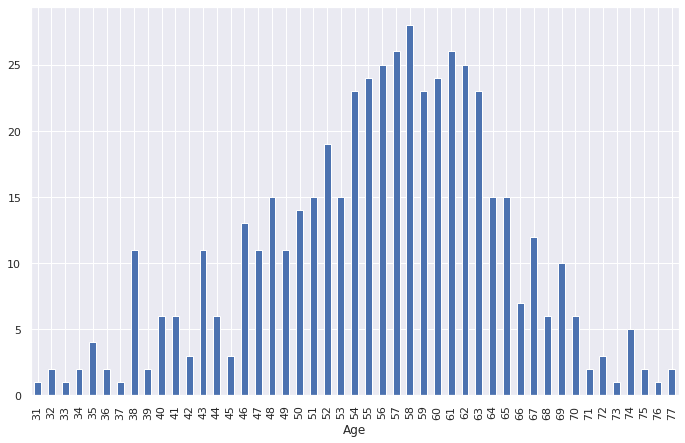

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

data = pd.read_csv("heart.csv")

data_heart_disease = data[data['HeartDisease'] == 1]

f = plt.figure(figsize=(10,6))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])
data_heart_disease.groupby('Age').Age.count().plot(kind='bar',ax=ax)
plt.plot()

Ahora, para comparar los datos entre hombres y mujeres, calculamos el intervalo de confianza para ambos por separado y luego realizar el análisis. Partimos con los hombres.

In [ ]:
data_heart_disease_men = data_heart_disease[data_heart_disease['Sex'] == 'M']
data_heart_disease_men_age_only = data_heart_disease_men['Age']
data_heart_disease_men_qty = len(data_heart_disease_men)

print("Cantidad de hombres con problemas cardiácos:")
print(data_heart_disease_men_qty)

print("Intervalo de confianza:",IC_media_Norm(data_heart_disease_men_age_only))


print("Media de edad:")
print(np.mean(data_heart_disease_men['Age']))


Cantidad de hombres con problemas cardiácos:
458
Intervalo de confianza: (55.064991054415586, 56.67300021195996)
Media de edad:
55.86899563318777


In [ ]:
data_heart_disease_women = data_heart_disease[data_heart_disease['Sex'] == 'F']
data_heart_disease_women_age_only = data_heart_disease_women['Age']
data_heart_disease_women_qty = len(data_heart_disease_women)

print("Cantidad de mujeres con problemas cardiácos:")
print(data_heart_disease_women_qty)

print("Intervalo de confianza:",IC_media_Norm(data_heart_disease_women_age_only))


print("Media de edad:")
print(np.mean(data_heart_disease_women['Age']))

Cantidad de mujeres con problemas cardiácos:
50
Intervalo de confianza: (53.924293466811775, 58.435706533188224)
Media de edad:
56.18


Ahora graficamos.

[]

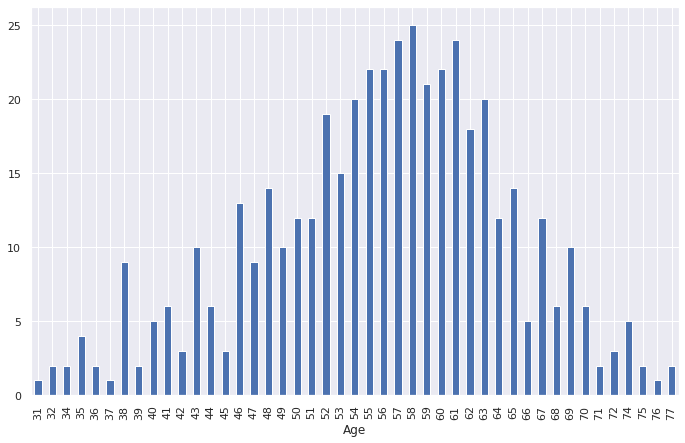

In [ ]:
f = plt.figure(figsize=(10,6))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])
data_heart_disease_men.groupby('Age').Age.count().plot(kind='bar',ax=ax)
plt.plot()

[]

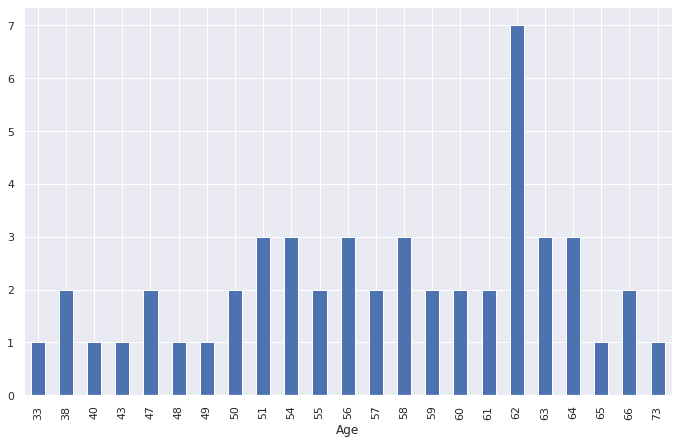

In [ ]:
f = plt.figure(figsize=(10,6))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])
data_heart_disease_women.groupby('Age').Age.count().plot(kind='bar',ax=ax)
plt.plot()

Finalmente ¿Pódemos afirmar que la media de edad para mujeres en este caso es 
mayor? Podemos estar muy seguros que sí, ya que la media al presentar problemas 
cardiácos en las mujeres es, en efecto, más alta que para los hombres. Sin 
embargo, el intervalo para la edad en mujeres también es más amplio, indicando
que la media podría ser menor o mayor dada una población diferente.
También es importante recalcar que la cantidad de hombres para este caso era
casi diez veces mayor que las mujeres.

### Pregunta 2)

Usando la mísma teoría que para el ejercicio anterior:

\begin{align}
P( \theta \in [ \theta_1, \theta_2]) = 1 - \alpha
\end{align}

Será de la siguiente forma:

\begin{align}
P( \theta \in [ \theta_1, \theta_2]) = 0.95
\end{align}

Entonces para obtener el intervalo de confianza deseado, utilizamos la fórmula:

\begin{align*}
 \left[\bar{X} - \frac{{t}^{n-1}_{\alpha/2} S}{\sqrt{n}} , \bar{X} + \frac{{t}^{n-1}_{\alpha/2} S}{\sqrt{n}} \right]
\end{align*}

Como disponemos de la maravillosa tecnología y de Python, podemos programar una función que nos calcule los intervalos de confianza dado una cantidad de alfas diferentes en el rango de cero a uno.

In [ ]:
from scipy.stats import t, norm, f, chi2

def IC_media_Norm(muestra, alpha, std_real=None):
  n = len(muestra)
  media_muestral = np.mean(muestra)
  if std_real is None: 
    std_real = np.std(muestra)
  confianza = 1-alpha
  z_alpha = norm.ppf(1-alpha/2)
  IC_inf = media_muestral - z_alpha * std_real/np.sqrt(n) 
  IC_sup = media_muestral + z_alpha * std_real/np.sqrt(n) 
  return IC_inf,IC_sup

def IC_between_range(muestra, precision):
  delta_alpha = 1 / precision
  alpha = 0
  for i in range(precision):
    print("Intervalo de confianza para alpha = ", alpha)
    print(IC_media_Norm(muestra, alpha))
    print("\n")
    alpha += delta_alpha


data = pd.read_csv("heart.csv")
data_heart_disease = data[data['HeartDisease'] == 1]
data_heart_disease_only_age = data_heart_disease['Age']

cantidad = 20
IC_between_range(data_heart_disease_only_age, cantidad)


Intervalo de confianza para alpha =  0
(-inf, inf)


Intervalo de confianza para alpha =  0.05
(55.14145462284182, 56.65775797558338)


Intervalo de confianza para alpha =  0.1
(55.26334535539201, 56.53586724303319)


Intervalo de confianza para alpha =  0.15000000000000002
(55.34276790499251, 56.45644469343269)


Intervalo de confianza para alpha =  0.2
(55.40387756366584, 56.39533503475936)


Intervalo de confianza para alpha =  0.25
(55.454629086353854, 56.344583512071345)


Intervalo de confianza para alpha =  0.3
(55.49869397741003, 56.30051862101517)


Intervalo de confianza para alpha =  0.35
(55.5380892288304, 56.2611233695948)


Intervalo de confianza para alpha =  0.39999999999999997
(55.57405105731243, 56.22516154111277)


Intervalo de confianza para alpha =  0.44999999999999996
(55.60739727235884, 56.19181532606636)


Intervalo de confianza para alpha =  0.49999999999999994
(55.638700721947075, 56.160511876478125)


Intervalo de confianza para alpha =  0.5499999999999999
(5

Notamos como el rango se reduce al incrementar el alfa, esto ocurre porque nuestro grado de confianza se reduce para alfas mayores. Ahora veamos que ocurre para los hombres y mujeres. Para esto, decidí hacer una función que toma ambos intervalos y los agrega a una lista, para así después poder mostrarlos por pantalla.

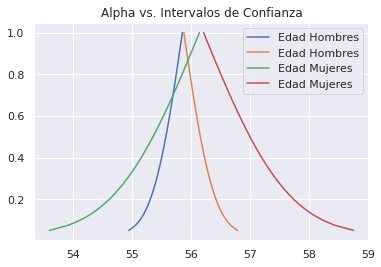

In [ ]:
import matplotlib.pyplot as plt

cantidad = 20

def IC_between_range_to_list(muestra, precision):
  product = []
  delta_alpha = 1 / precision
  alpha = 0
  for i in range(precision):
    product.append(IC_media_Norm(muestra, alpha))
    alpha += delta_alpha

  return product

def alpha_to_array(precision):
  product = []
  delta_alpha = 1 / precision
  alpha = 0
  for i in range(precision):
    product.append(alpha)
    alpha += delta_alpha

  return product

cantidad = 40
men_data_array = IC_between_range_to_list(data_heart_disease_men['Age'], cantidad)
women_data_array = IC_between_range_to_list(data_heart_disease_women['Age'], cantidad)
alpha_array = alpha_to_array(cantidad)

alpha_array = []
a = 0
for i in range(cantidad):
  a += 1 / cantidad
  alpha_array.append(a)

plt.title('Alpha vs. Intervalos de Confianza')
plt.plot(men_data_array, alpha_array, label = "Edad Hombres")
plt.plot(women_data_array, alpha_array, label = "Edad Mujeres")
plt.legend()


A partir de esto, podemos notar como los intervalos de confianza disminuyen en rango en donde cierto punto las cotas se intersectan. De esto podemos inferir que hay ciertos intervalos de confianza que pueden alterar la respuesta a nuestra hipótesis, en específico, para alfas cercanos a 0.675, la edad de las mujeres tiende a ser similar a la de los hombres a la hora de presentar problemas cardiácos. Sin embargo, también hay que notar que la media nunca cambia, independiente del alfa dado.

### Pregunta 3)
Se está realizando una campaña preventiva contra las enfermedades al corazón, donde se ha observado que estas enfermedades afectan principalmente a personas mayores de 50 años. Sin embargo, se busca determinar si afecta más a los hombres o a las mujeres, o bien afecta a ambos sexos por igual. Considerando solamente a las personas mayores de 50 años, determine si la proporción de hombres con enfermedades al corazón es mayor que la proporción de mujeres con enfermedades al corazón. (15 pts)

In [ ]:
def IC_prop_diff(datos1,datos2,alpha=0.05):
    n1 = len(datos1)
    n2 = len(datos2)
    media1 = np.mean(datos1)
    media2 = np.mean(datos2)
    diff = media1-media2
    print("La diferencia de medias equivale a: ", diff)
    ALPHA = norm.ppf(1-alpha/2)
    prop1 = (media1*(1-media1))/n1
    prop2 = (media2*(1-media2))/n2
    form = ALPHA*np.sqrt(prop1+prop2)
    ICinf = diff - form
    ICsup = diff + form
    return (ICinf,ICsup)

    
    

Total = data[data['Age'] > 50]
Hombres = Total[Total['Sex'] == 'M']
HombresCorazon = Hombres['HeartDisease']


Mujeres = Total[Total['Sex'] == 'F']
MujeresCorazon = Mujeres['HeartDisease']

IC_prop_diff(HombresCorazon,MujeresCorazon,alpha=0.05)


La diferencia de medias equivale a:  0.3672350682974735


(0.27172270174452595, 0.462747434850421)

Como se puede observar, tomando como nivel de confianza un 95% se puede confirmar por los Intervalos de Confianza obtenidos que la proporción de los hombres con problemas al corazón es mayor a la proporción de las mujeres con problemas al corazón, por lo que podemos verificar que estos problemas al corazón afectan mas a los hombres

### Pregunta 4

Determine si la media del colesterol de los hombres "sanos"(HeartDisease=0) es mayor que la media del colesterol de las mujeres "sanas". Además, analice lo que ocurre con sus varianzas y concluya al respecto. (20 pts). IMPORTANTE: No considere los datos que tengan Cholesterol=0

In [ ]:
from scipy.stats import t, norm, f, chi2
#Intervalo de Confianza para la diferencia de medias sin varianza

def IC_diferencia_medias_sinV(datos1,datos2,alpha=0.05):
    n1=len(datos1)
    n2=len(datos2)
    media1=np.mean(datos1)
    media2=np.mean(datos2)
    std1=np.std(datos1,ddof=1)
    std2=np.std(datos2,ddof=1)
    grados_libertad=((((std1**2)/n1)+((std2**2)/n2))**2)/(((((std1**2)/n1)**2)/(n1-1))+(((std2**2)/n2)**2)/(n2-1))
    t_alpha=t.ppf(1-alpha/2, df=grados_libertad)    
    ICinf=(media1-media2)-t_alpha*np.sqrt((std1/n1)+(std2/n2))
    ICsup=(media1-media2)+t_alpha*np.sqrt((std1/n1)+(std2/n2))
    print("La diferencia entre las medias es: ",(media1-media2))
    return(ICinf,ICsup)

#Intervalo de Confianza para varianza   

def IC_var(datos,alpha=0.05):
  n=len(datos)
  std = np.std(datos)
  chi_alpha1 = chi2.ppf(1-alpha/2, df=n-1)
  chi_alpha2 = chi2.ppf(alpha/2, df=n-1)
  ICinf = (((n-1)*std)/chi_alpha1)
  ICsup = (((n-1)*std)/chi_alpha2)
  return(ICinf,ICsup)

#Intervalo de Confianza para el cuociente de dos varianzas

def IC_couc_var(datos1,datos2,alpha=0.05):
  n1 = len(datos1)
  n2 = len(datos2)
  std1 = np.std(datos1)
  std2 = np.std(datos2)
  ALPHA1 = f.ppf((alpha/2),n1-1,n2-1)
  ALPHA2 = f.ppf(1-(alpha/2),n1-1,n2-1)
  couciente = std1/std2
  ICinf = ALPHA1*couciente
  ICsup = ALPHA2*couciente
  return(ICinf,ICsup)


HombresTotal = data[data['Sex'] == 'M']
HombreSanos = HombresTotal[HombresTotal["HeartDisease"] == 0]

HombresCol = HombreSanos[HombreSanos['Cholesterol'] != 0]
HombresCol = HombresCol['Cholesterol']

MujeresTotal = data[data['Sex'] == 'F']
MujeresSanos = MujeresTotal[MujeresTotal["HeartDisease"] == 0]

MujeresCol = MujeresSanos[MujeresSanos['Cholesterol'] != 0]
MujeresCol = MujeresCol['Cholesterol']

MediaHombre = np.mean(HombresCol)
MediaMujer = np.mean(MujeresCol)


print("\nIntevalo de Confianza para la diferencia de medias:", IC_diferencia_medias_sinV(HombresCol,MujeresCol,alpha=0.05))

print("\nIntervalo de Confianza para la Varinza de hombres:",IC_var(HombresCol,alpha=0.05))

print("\nIntervalo de Confianza para la Varinza de Mujeres:", IC_var(MujeresCol,alpha=0.05))

print("\nIntervalo de Confianza para el couciente de las dos varianzas:", IC_couc_var(HombresCol,MujeresCol,alpha=0.05))





La diferencia entre las medias es:  -16.37664697864605

Intevalo de Confianza para la diferencia de medias: (-17.953357048451323, -14.799936908840778)

Intervalo de Confianza para la Varinza de hombres: (42.35046202249843, 60.30491092976554)

Intervalo de Confianza para la Varinza de Mujeres: (49.74396135341458, 79.46971172364579)

Intervalo de Confianza para el couciente de las dos varianzas: (0.6064910137126119, 1.0909249532607133)


Al ver los intervalos de confianza de las medias se puede ver que la media del colesterol en la mujeres "sanas" es mayor que la media del colesterol en los hombres "sanos", debido a que tanto su intervalo inferior como superior dan como resultado un numero negativo.

Otra cosa que se puede analizar es que el Intervalo de Confianza para el cuociente de dos varianzas si pasa por el uno, lo que podemos concluir que las varianzas son similares, también se puede concluir que la varianza del colesterol dentro de las mujeres "sanas" es mayor a la varianza del colesterol de hombres "sanos", por lo que el colesterol de las mujeres "sanas" esta mas disperso que el colesterol de los hombres "sanos", lo anterior se afirmo con un intervalo de confianza para la varianza con un nivel de confianza del 95%



### Pregunta 5

5. Se cree que la media de la presión arterial durante el reposo (RestingBP) suele ser mayor en personas con enfermedades al corazón (HeartDisease=1). Para las siguiente preguntas **considere un nivel de confianza del $99.5\%$. Además, No considere los datos que tengan RestingBP=0**

    > a) Determine si la afirmación es verdadera considerando solamente a las mujeres. En caso de no ser cierta, ¿Cuál es el valor mínimo de $\alpha$ para que la afirmación sea verdadera? **(5 pts)**

    > b) Determine si la afirmación es verdadera considerando solamente a los hombres. En caso de no ser cierta, ¿Cuál es el valor mínimo de $\alpha$ para que la afirmación sea verdadera? **(5 pts)**

    > c) Determine si la afirmación es verdadera para todas las personas. En caso de no ser cierta, ¿Cuál es el valor mínimo de $\alpha$ para que la afirmación sea verdadera? **(5 pts)**

Primero, veamos como se distribuyen las presiones arteriales, tomando en consideración si es que poseen o no problemas cardiácos.

### Distribución para las mujeres

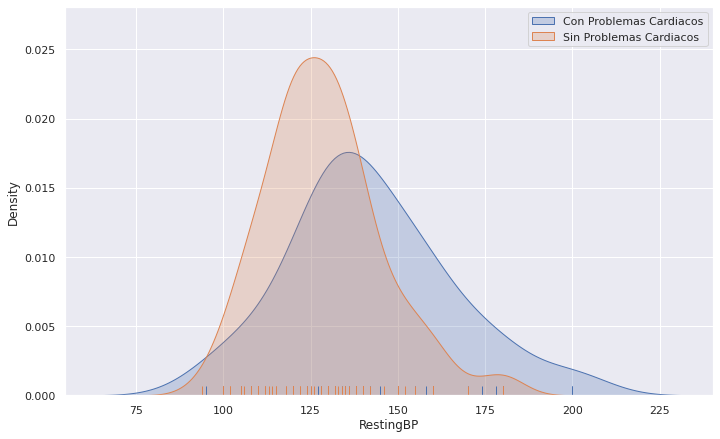

La media de presiones arteriales para mujeres con problemas cardiácos:
142.0
La media de presiones arteriales para mujeres sin problemas cardiácos:
128.7902097902098
El intervalo de confianza de presión para mujeres con problemas cardiácos (Dist. Normal)
(132.86544457836064, 151.13455542163936)
El intervalo de confianza de presión para mujeres sin problemas cardiácos (Dist. Normal)
(124.90039102851513, 132.68002855190443)


In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,6))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

data_men = data[data['Sex'] == 'M']
data_women = data[data['Sex'] == 'F']
data_women_disease = data_women[data_women['HeartDisease'] == 1]
data_women_no_disease = data_women[data_women['HeartDisease'] == 0]
data_women_disease_resting = data_women_disease['RestingBP']
data_women_no_disease_resting = data_women_no_disease['RestingBP']

sns.distplot(data_women_disease_resting, ax=ax, rug=True, hist=False, kde=True, kde_kws={"shade": True}, label = 'Con Problemas Cardiacos')
sns.distplot(data_women_no_disease_resting, ax=ax, rug=True, hist=False, kde=True, kde_kws={"shade": True}, label = 'Sin Problemas Cardiacos')
plt.legend()
plt.show()

print("La media de presiones arteriales para mujeres con problemas cardiácos:")
print(np.mean(data_women_disease_resting))

print("La media de presiones arteriales para mujeres sin problemas cardiácos:")
print(np.mean(data_women_no_disease_resting))

print("El intervalo de confianza de presión para mujeres con problemas cardiácos (Dist. Normal)")
print(IC_media_Norm(data_women_disease_resting, 0.005))

print("El intervalo de confianza de presión para mujeres sin problemas cardiácos (Dist. Normal)")
print(IC_media_Norm(data_women_no_disease_resting, 0.005))

### Distribución para los hombres

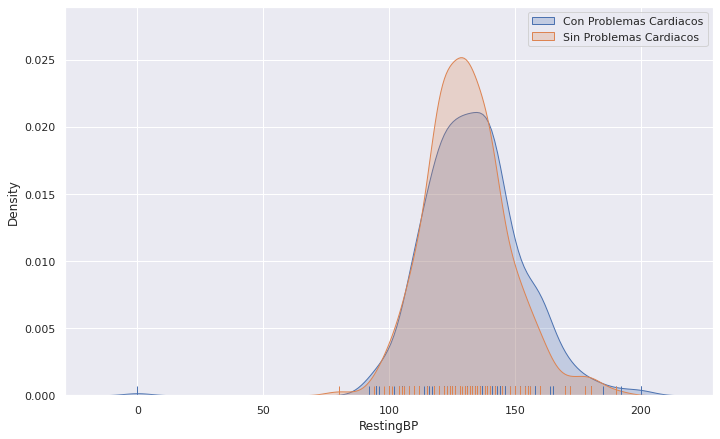

La media de presiones arteriales para hombres con problemas cardiácos:
133.33187772925766
La media de presiones arteriales para hombres sin problemas cardiácos:
130.9250936329588
El intervalo de confianza de presión para hombres con problemas cardiácos (Dist. Normal)
(130.80874082280158, 135.85501463571373)
El intervalo de confianza de presión para hombres sin problemas cardiácos (Dist. Normal)
(128.11091244612714, 133.73927481979047)


In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,6))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

data_men_disease = data_men[data_men['HeartDisease'] == 1]
data_men_no_disease = data_men[data_men['HeartDisease'] == 0]
data_men_disease_resting = data_men_disease['RestingBP']
data_men_no_disease_resting = data_men_no_disease['RestingBP']

sns.distplot(data_men_disease_resting, ax=ax, rug=True, hist=False, kde=True, kde_kws={"shade": True}, label = 'Con Problemas Cardiacos')
sns.distplot(data_men_no_disease_resting, ax=ax, rug=True, hist=False, kde=True, kde_kws={"shade": True}, label = 'Sin Problemas Cardiacos')
plt.legend()
plt.show()

print("La media de presiones arteriales para hombres con problemas cardiácos:")
print(np.mean(data_men_disease_resting))

print("La media de presiones arteriales para hombres sin problemas cardiácos:")
print(np.mean(data_men_no_disease_resting))

print("El intervalo de confianza de presión para hombres con problemas cardiácos (Dist. Normal)")
print(IC_media_Norm(data_men_disease_resting, 0.005))

print("El intervalo de confianza de presión para hombres sin problemas cardiácos (Dist. Normal)")
print(IC_media_Norm(data_men_no_disease_resting, 0.005))

### Distribución independiente del sexo

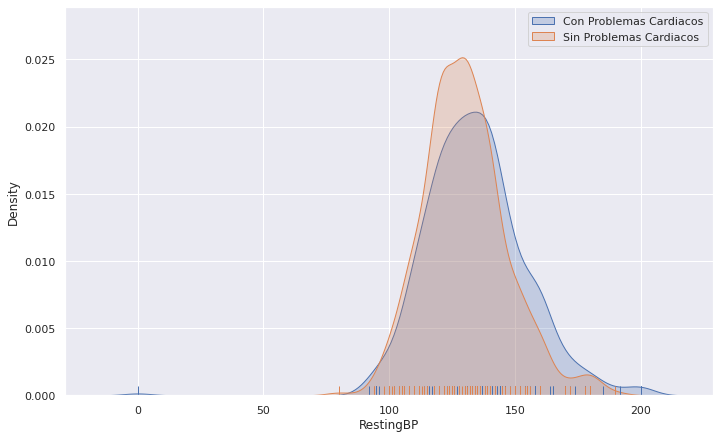

La media de presiones arteriales para personas con problemas cardiácos:
134.18503937007873
La media de presiones arteriales para personas sin problemas cardiácos:
130.18048780487806

Usando un alpha = 0.005

El intervalo de confianza de presión para hombres con problemas cardiácos (Dist. Normal)
(130.80874082280158, 135.85501463571373)
El intervalo de confianza de presión para hombres sin problemas cardiácos (Dist. Normal)
(128.11091244612714, 133.73927481979047)


In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,6))
ax = f.add_axes([0.1, 0.1, 0.9, 0.9])

data_heart_disease = data[data['HeartDisease'] == 1]
data_heart_no_disease = data[data['HeartDisease'] == 0]

data_resting = data['RestingBP']

data_resting_disease = data_heart_disease['RestingBP']
data_resting_no_disease = data_heart_no_disease['RestingBP']

sns.distplot(data_resting_disease, ax=ax, rug=True, hist=False, kde=True, kde_kws={"shade": True}, label = 'Con Problemas Cardiacos')
sns.distplot(data_resting_no_disease, ax=ax, rug=True, hist=False, kde=True, kde_kws={"shade": True}, label = 'Sin Problemas Cardiacos')
plt.legend()
plt.show()

print("La media de presiones arteriales para personas con problemas cardiácos:")
print(np.mean(data_resting_disease))

print("La media de presiones arteriales para personas sin problemas cardiácos:")
print(np.mean(data_resting_no_disease))

print("\nUsando un alpha = 0.005\n")

print("El intervalo de confianza de presión para hombres con problemas cardiácos (Dist. Normal)")
print(IC_media_Norm(data_men_disease_resting, 0.005))

print("El intervalo de confianza de presión para hombres sin problemas cardiácos (Dist. Normal)")
print(IC_media_Norm(data_men_no_disease_resting, 0.005))

Dados los datos presentes, podemos empezar a responder las preguntas:

> a) Determine si la afirmación es verdadera considerando solamente a las mujeres. En caso de no ser cierta, ¿Cuál es el valor mínimo de $\alpha$ para que la afirmación sea verdadera? **(5 pts)**

Para las mujeres, es aparente que al tener problemas al corazón, la tendencia de tener presión alta. Esto se puede ver a através del gráfico, en donde la frecuencia para presiones altas es significativamente mayor para personas con problemas cardiácos, además de tener una media de presión mucho mayor.

#### Si se cumple.

> b) Determine si la afirmación es verdadera considerando solamente a los hombres. En caso de no ser cierta, ¿Cuál es el valor mínimo de $\alpha$ para que la afirmación sea verdadera? **(5 pts)**

Para los hombres, la respuesta es mucho más difusa, ya que la frecuencia para presiones más altas es mayor, pero con un grado mucho menor que en las mujeres. Al igual que en el caso anterior, la media de presión también es mayor, pero con un margen reducido.

#### Si se cumple.

> c) Determine si la afirmación es verdadera para todas las personas. En caso de no ser cierta, ¿Cuál es el valor mínimo de $\alpha$ para que la afirmación sea verdadera? **(5 pts)**

Para la población general, se comporta de forma muy similar a la distribución de los hombres, sin embargo, también se cumple que las personas con problemas cardiácos tienden a tener presiones más altas.

#### Si se cumple.

### Pregunta 6 

El dolor en el pecho al realizar ejercicios (ExerciseAngina='Y') es un síntoma que se suele presentar en personas con enfermedades al corazón, ya que el corazón de estas personas no recibe suficiente sangre oxigenada.

a) Considerando solamente a las personas con enfermedades al corazón, ¿Se puede afirmar que la proporción de personas con dolor en el pecho cuando realizan ejercicios (ExerciseAngina='Y')` es mayor al 50%?, ¿Cuál es el máximo nivel de confianza con el cual se cumple esta afirmación? (15 pts)

b) ¿Qué ocurre si solamente se consideran a las mujeres con enfermedades al corazón en la pregunta a)? (5 pts)

c) ¿Qué ocurre si solamente se consideran a los hombres con enfermedades al corazón en la pregunta a)? (5 pts)

In [ ]:
#Parte a

#IC proporcion para ExerciseAngina
def IC_prop(datos, alpha = 0.001):
  cont = 0
  for i in datos:
      if i == 'Y':
        cont+=1
  n = len(datos)
  p = cont/n
  z_alpha = norm.ppf(1-alpha/2) 
  inter = z_alpha * np.sqrt((p*(1-p))/n)
  ICinf = p - inter
  ICsup = p + inter
  return(ICinf,ICsup)  
  
PersonasCorazon = data[data['HeartDisease'] == 1]
PersonasEx = PersonasCorazon['ExerciseAngina']

print('\nIntervalo de Confianza para una proporcion de Personas con dolor de pecho al hacer ejercicio para las personas con problemas al corazon:\n', IC_prop(PersonasEx))

#Parte b

MujeresCorazon = PersonasCorazon[PersonasCorazon['Sex']=='F']
MujeresEx = MujeresCorazon['ExerciseAngina']

print('\nIntervalo de Confianza para una proporcion de Mujeres con dolor de pecho al hacer ejercicio para los mujeres con problemas al corazon:\n', IC_prop(MujeresEx,0.58))

#Parte c

HombresCorazon = PersonasCorazon[PersonasCorazon['Sex']=='M']
HombresEx = HombresCorazon['ExerciseAngina']

print('\nIntervalo de Confianza para una proporcion de Hombres con dolor de pecho al hacer ejercicio para los hombres con problemas al corazon:\n', IC_prop(HombresEx))


Intervalo de Confianza para una proporcion de Personas con dolor de pecho al hacer ejercicio para las personas con problemas al corazon:
 (0.5512585320816473, 0.6928359561073291)

Intervalo de Confianza para una proporcion de Mujeres con dolor de pecho al hacer ejercicio para los mujeres con problemas al corazon:
 (0.5009952088781681, 0.579004791121832)

Intervalo de Confianza para una proporcion de Hombres con dolor de pecho al hacer ejercicio para los hombres con problemas al corazon:
 (0.5568119565738886, 0.7051967770505655)


a) Una vez obtenido el intervalo de confianza, si se puede puede afirmar que la proporción de personas con dolor en el pecho cuando realizan ejercicios es mayor al 50%, una vez obtenido este resultado se obtuvo que el máximo nivel de confianza donde se cumple la afirmación es de un nivel de confianza de un 99.9%

b) Si solamente se consideran las mujeres la afirmación deja de realizarse con un 95%, esto se debe a que el intevalo inferior llega a ser menor que 50%, para que el limite inferior se mayor que 50%, el nivel de confianza debe ser de 42%, el cual es el máximo nivel de confianza para el cual se cumpla la afirmación

c)Si solamente se consideran los hombres la afirmación se realiza, siendo su máximo nivel de confianza de 99.9%, al igual que la población total

# Código de Honor UTFSM
La realización de este taller de adhiere al código de honor de la Universidad Federico Santa María.